(gallery-shapes-triangle)=

# Triangular Meshes

The magnetic field of a homogeneously magnetized body is equivalent to the field of a charged surface. The surface is the hull of the body and the charge density is proportional to the projection of the magnetization vector onto the surface normal.

It is very common to approximate the surface of bodies by triangular meshes, which can then be transformed into magnets using the `Triangle` and the `TriangularMesh` classes. When using these classes one should abide by the following rules:

1. The surface must be closed, or, all missing faces must have zero charge (magnetization vector perpendicular to surface normal).
2. All triangles are oriented outwards (right-hand-rule)
3. The surface must not be self-intersecting.
4. For the B-field the magnetic polarization must be added on the inside of the body.

## Cuboctahedron Magnet

In this example `Triangle` is used to create a magnet with cuboctahedral shape. Notice that triangle orientation is displayed by default for convenience.

/home/docs/checkouts/readthedocs.org/user_builds/magpylib/envs/stable/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


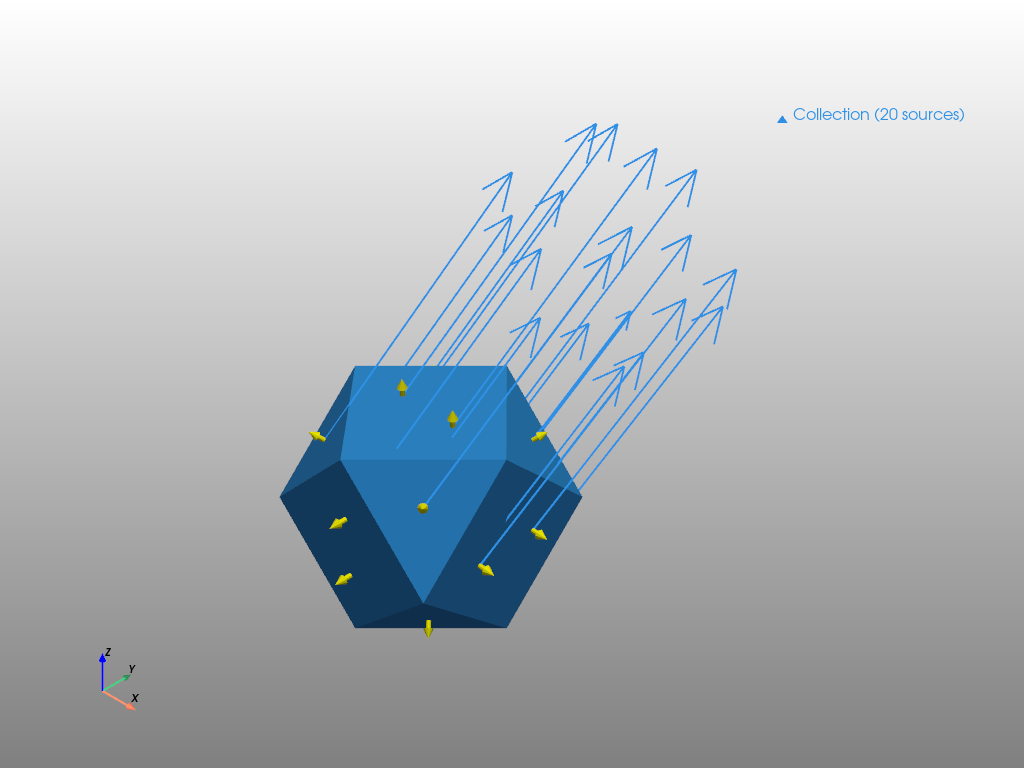

In [1]:
import magpylib as magpy
import numpy as np

# Create collection of triangles
triangles_cm = [
    ([0, 1, -1], [-1, 1, 0], [1, 1, 0]),
    ([0, 1, 1], [1, 1, 0], [-1, 1, 0]),
    ([0, 1, 1], [-1, 0, 1], [0, -1, 1]),
    ([0, 1, 1], [0, -1, 1], [1, 0, 1]),
    ([0, 1, -1], [1, 0, -1], [0, -1, -1]),
    ([0, 1, -1], [0, -1, -1], [-1, 0, -1]),
    ([0, -1, 1], [-1, -1, 0], [1, -1, 0]),
    ([0, -1, -1], [1, -1, 0], [-1, -1, 0]),
    ([-1, 1, 0], [-1, 0, -1], [-1, 0, 1]),
    ([-1, -1, 0], [-1, 0, 1], [-1, 0, -1]),
    ([1, 1, 0], [1, 0, 1], [1, 0, -1]),
    ([1, -1, 0], [1, 0, -1], [1, 0, 1]),
    ([0, 1, 1], [-1, 1, 0], [-1, 0, 1]),
    ([0, 1, 1], [1, 0, 1], [1, 1, 0]),
    ([0, 1, -1], [-1, 0, -1], [-1, 1, 0]),
    ([0, 1, -1], [1, 1, 0], [1, 0, -1]),
    ([0, -1, -1], [-1, -1, 0], [-1, 0, -1]),
    ([0, -1, -1], [1, 0, -1], [1, -1, 0]),
    ([0, -1, 1], [-1, 0, 1], [-1, -1, 0]),
    ([0, -1, 1], [1, -1, 0], [1, 0, 1]),
]
triangles = np.array(triangles_cm) / 100  # cm -> m
cuboc = magpy.Collection()
for t in triangles:
    cuboc.add(
        magpy.misc.Triangle(
            polarization=(0.1, 0.2, 0.3),
            vertices=t,
        )
    )

# Display collection of triangles
magpy.show(
    cuboc,
    backend="pyvista",
    style_magnetization_mode="arrow",
    style_orientation_color="yellow",
)

## Triangular Prism Magnet

Consider a prism with triangular base that is magnetized orthogonal to the base. All surface normals of the sides of the prism are orthogonal to the magnetization vector. As a result the sides do not contribute to the magnetic field because their charge density disappears. Only top and bottom surfaces contribute. One must be very careful when defining those surfaces in such a way that the surface normals point outwards.

Leaving out parts of the surface that do not contribute to the field is beneficial for the computation speed.

In [2]:
import magpylib as magpy

# Create prism magnet as triangle collection
top = magpy.misc.Triangle(
    polarization=(0, 0, 1),
    vertices=((-0.01, -0.01, 0.01), (0.01, -0.01, 0.01), (0, 0.02, 0.01)),
    style_label="top",
)
bott = magpy.misc.Triangle(
    polarization=(0, 0, 1),
    vertices=((-0.01, -0.01, -0.01), (0, 0.02, -0.01), (0.01, -0.01, -0.01)),
    style_label="bottom",
)
prism = magpy.Collection(top, bott)

# Display graphically
magpy.show(*prism, backend="plotly", style_opacity=0.5, style_magnetization_show=False)

## TriangularMesh class

While `Triangle` simply provides the field of a charged triangle and can be used to contruct complex forms, it is prone to error and tedious to work with when meshes become large. For this purpose the `TriangularMesh` class ensures proper and convenient magnet creation by automatically checking mesh integrity and by orienting the faces at initialization.

```{attention}
Automatic face reorientation of `TriangularMesh` may fail when the mesh is open.
```

In this example we revisit the cuboctahedron, but generate it through the `TriangularMesh` class.

In [3]:
import magpylib as magpy
import numpy as np

# Create cuboctahedron magnet (vertices and faces are transposed here for more compact display)
vertices_cm = [
    [0, -1, 1, 0, -1, 0, 1, 1, 0, -1, -1, 1],
    [1, 1, 1, 1, 0, -1, 0, 0, -1, 0, -1, -1],
    [-1, 0, 0, 1, 1, 1, 1, -1, -1, -1, 0, 0],
]
vertices = np.array(vertices_cm).T / 100  # cm -> m
faces = [
    [0, 3, 3, 3, 0, 0, 5, 8, 1, 10, 2, 11, 3, 3, 0, 0, 8, 8, 5, 5],
    [1, 2, 4, 5, 7, 8, 10, 11, 9, 4, 6, 7, 1, 6, 9, 2, 10, 7, 4, 11],
    [2, 1, 5, 6, 8, 9, 11, 10, 4, 9, 7, 6, 4, 2, 1, 7, 9, 11, 10, 6],
]
faces = np.array(faces).T
cuboc = magpy.magnet.TriangularMesh(
    polarization=(0.1, 0.2, 0.3), vertices=vertices, faces=faces
)

# Display TriangularMesh body
magpy.show(
    cuboc, backend="plotly", style_mesh_grid_show=True, style_mesh_grid_line_width=4
)

The `TriangularMesh` class is extremely powerful as it enables almost arbitrary magnet shapes. It is described in detail in {ref}`docu-magpylib-api-trimesh`. There are many ways to generate such triangular meshes. An example thereof is shown in {ref}`gallery-shapes-pyvista`.

```{caution}
* `getB` and `getH` compute the fields correctly only if the mesh is closed, not self-intersecting, and all faces are properly oriented outwards.

* Input checks and face reorientation can be computationally expensive. The checks can individually be deactivated by setting `reorient_faces="skip"`, `check_open="skip"`, `check_disconnected="skip"`, and `check_selfintersecting="skip"` at initialization of `TriangularMesh` objects. The checks can also be performed by hand after initialization.

* Meshing tools such as the [Pyvista](https://docs.pyvista.org/) library can be very convenient for building complex shapes, but often do not guarantee that the mesh is properly closed or connected - see {ref}`gallery-shapes-pyvista`.

* Meshing tools often create meshes with a lot of faces, especially when working with curved surfaces. Keep in mind that the field computation takes of the order of a few microseconds per observer position per face, and that RAM is a limited resource.
```

## Open TriangularMesh

In some cases it may be desirable to generate a `TriangularMesh` object from an open mesh (see Prism example above). In this case one has to be extremely careful because one cannot rely on the checks. Not to generate warnings or error messages, these checks can be disabled with `"skip"` or their outcome can be ignored with `"ignore"`. The `show` function can be used to view open edges and disconnected parts. In the following example we generate such an open mesh directly from `Triangle` objects.

In [4]:
import magpylib as magpy
import numpy as np

# Create top and bottom faces of a prism magnet
top = magpy.misc.Triangle(
    polarization=(1, 0, 0),
    vertices=((-0.01, -0.01, 0.01), (0.01, -0.01, 0.01), (0, 0.02, 0.01)),
)
bottom = magpy.misc.Triangle(
    polarization=(1, 0, 0),
    vertices=((-0.01, -0.01, -0.01), (0, 0.02, -0.01), (0.01, -0.01, -0.01)),
)

# Create prism with open edges
prism = magpy.magnet.TriangularMesh.from_triangles(
    polarization=(0, 0, 1),  # overrides triangles magnetization
    triangles=[top, bottom],
    check_open="ignore",  # check but ignore open mesh
    check_disconnected="ignore",  # check but ignore disconnected mesh
    reorient_faces="ignore",  # check but ignore non-orientable mesh
)
prism.style.label = "Open Prism"
prism.style.magnetization.mode = "arrow"

print("mesh status open:", prism.status_open)
print("mesh status disconnected:", prism.status_disconnected)
print("mesh status self-intersecting:", prism.status_selfintersecting)
print("mesh status reoriented:", prism.status_reoriented)

prism.show(
    backend="plotly",
    style_mesh_open_show=True,
    style_mesh_disconnected_show=True,
)

mesh status open: True
mesh status disconnected: True
mesh status self-intersecting: False
mesh status reoriented: True


```{caution}
Keep in mind that the inside-outside check will fail, so that `getB` may yield wrong results on the inside of the prism where the polarization vector should be added.
```